# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [5]:
describe(data)

3×8 DataFrame. Omitted printing of 1 columns
│ Row │ variable │ mean     │ min   │ median   │ max    │ nunique │ nmissing │
│     │ Symbol   │ Union…   │ Any   │ Union…   │ Any    │ Union…  │ Nothing  │
├─────┼──────────┼──────────┼───────┼──────────┼────────┼─────────┼──────────┤
│ 1   │ x        │ 514938.0 │ 19835 │ 505338.0 │ 961951 │         │          │
│ 2   │ y        │ 494709.0 │ 51121 │ 526260.0 │ 970756 │         │          │
│ 3   │ cluster  │          │ 1     │          │ 9      │ 15      │          │

In [3]:
k = 15
mMatrix = Matrix(data[:,1:2])'
result = kmeans(mMatrix, k)

KmeansResult{Array{Float64,2},Float64,Int64}([612001.2593192869 139682.37572254337 … 670929.0681818182 400011.4830508475; 483041.0632090762 558123.4046242775 … 862765.7329545454 404474.99717514124], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  14, 14, 14, 14, 14, 14, 14, 14, 14, 14], [7.33151035349585e9, 8.5127447147421875e9, 8.775560590144287e9, 4.72277875594165e9, 1.6187390657141113e10, 6.128515981958008e9, 4.887090264661133e9, 8.432457851249512e9, 2.841891040071289e9, 8.434160389880127e9  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [617, 346, 350, 327, 340, 315, 328, 321, 352, 126, 341, 323, 208, 352, 354], [617, 346, 350, 327, 340, 315, 328, 321, 352, 126, 341, 323, 208, 352, 354], 1.3560118399540346e13, 12, true)

In [8]:
data[:,:cluster] = string.(assignments(result));
result.centers

2×15 Array{Float64,2}:
 612001.0  139682.0  858530.0  852058.0  …  165909.0  670929.0  400011.0
 483041.0  558123.0  546435.0  157686.0     364344.0  862766.0  404475.0

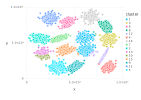

In [10]:
using Gadfly
plot(data, x="x", y="y", color="cluster", Geom.point)